In [737]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [738]:
bk = pd.read_csv("day.csv")
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [739]:
bk

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [740]:
bk.shape

(730, 16)

In [741]:
## Check any null values or missing values
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [742]:
### No missing values or null values

In [743]:
bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [744]:
## lets rename the column to meaningful name
bk = bk.rename(columns={'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'cnt': 'count', 'hum': 'humidity', 'dteday':'date'})

In [745]:
bk.info()
bk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weather     730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [746]:
## Change couple of columns as category as those are more of category type vars
cat_cols = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for col in cat_cols:
    bk[col] = bk[col].astype('category')
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   date        730 non-null    object  
 2   season      730 non-null    category
 3   year        730 non-null    int64   
 4   month       730 non-null    category
 5   holiday     730 non-null    category
 6   weekday     730 non-null    category
 7   workingday  730 non-null    category
 8   weather     730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  humidity    730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  count       730 non-null    int64   
dtypes: category(6), float64(4), int64(5), object(1)
memory usage: 62.7+ KB


In [747]:
##Check Unique datas
bk.apply(lambda x: len(x.unique()))

instant       730
date          730
season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weather         3
temp          498
atemp         689
humidity      594
windspeed     649
casual        605
registered    678
count         695
dtype: int64

In [748]:
## Looking at the data we can drop couple of irrelavent columns like instant 
bk = bk.drop(columns={'instant', 'date'})
bk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  count       730 non-null    int64   
dtypes: category(6), float64(4), int64(4)
memory usage: 51.3 KB


[Text(0.5, 1.0, 'Cout of bikes during weekdays in a every month')]

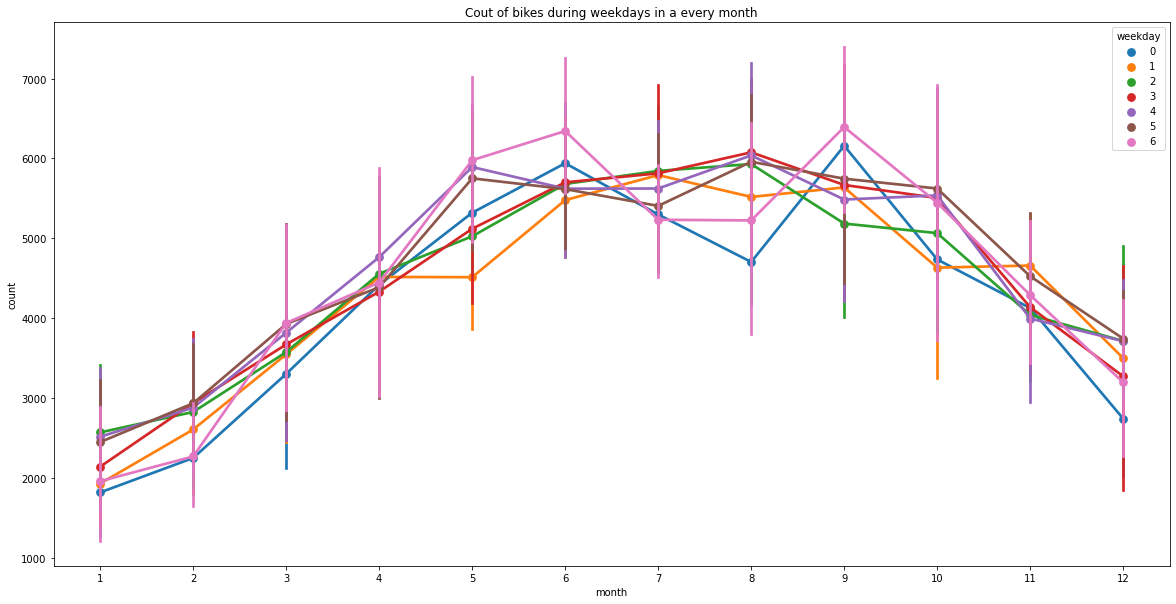

In [749]:
## EDA lets plot and analyse the Data
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bk, x='month', y='count', hue='weekday', ax=ax )
ax.set(title="Cout of bikes during weekdays in a every month")

In [750]:
## Observation : Usage of Bike is lower in first quarter of the year and last quarter of the year compare to other months


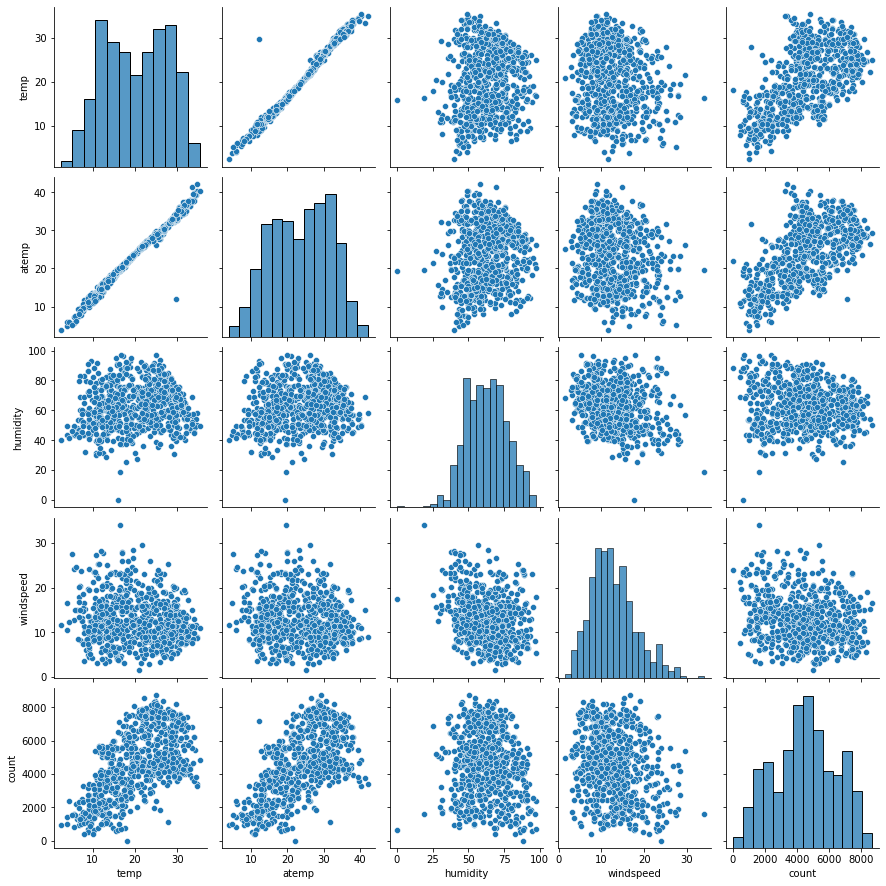

In [751]:
## Lets visualise full data with dynamic variables
sns.pairplot(bk, vars=['temp', 'atemp', 'humidity', 'windspeed', 'count'])
plt.show()

In [752]:
# Vars temp and atemp got positive linear relationship

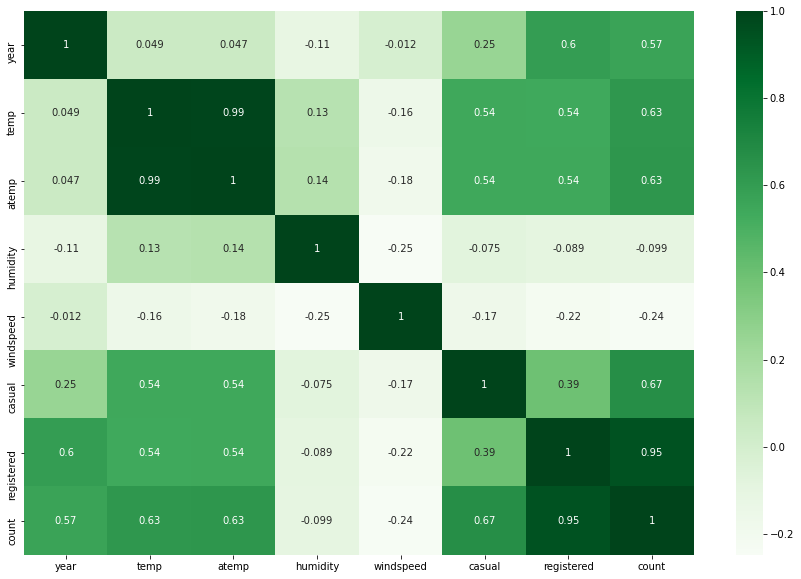

In [753]:
##lets drow a heatmap to understand the correlation
plt.figure(figsize=(15,10))
sns.heatmap(bk.corr(), annot=True, cmap="Greens" )
plt.show()

In [754]:
# Registered and Casual got very high correlation , so lets drop casual and registared
bk = bk.drop(columns={'casual', 'registered'})

In [755]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(6), float64(4), int64(2)
memory usage: 39.9 KB


In [756]:
## Lets find VIF to decide which variable to drop

In [757]:
vars = bk[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
X = add_constant(vars)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const        52.978017
temp         62.993716
atemp        63.935491
humidity      1.178404
windspeed     1.187971
count         1.862057
dtype: float64

In [758]:
# Dipping atemp as he is the highest VIF 
bk = bk.drop(columns={'atemp'}, axis=1)
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   humidity    730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  count       730 non-null    int64   
dtypes: category(6), float64(3), int64(2)
memory usage: 34.2 KB


<AxesSubplot:xlabel='weather', ylabel='count'>

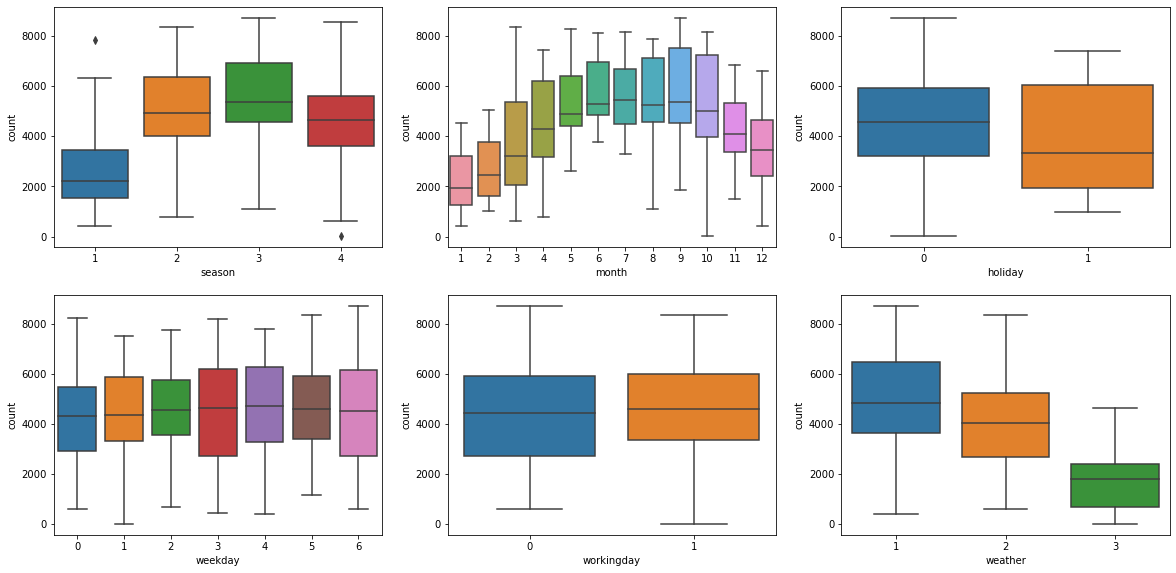

In [759]:
# Lets plot all the categorical vars
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='count', data=bk)
plt.subplot(3,3,2)
sns.boxplot(x='month', y='count', data=bk)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y='count', data=bk)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='count', data=bk)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='count', data=bk)
plt.subplot(3,3,6)
sns.boxplot(x='weather', y='count', data=bk)

In [760]:
## Observation : from the abive graph we an clearly say  that Week day and Working day medians are always same so not much variance in either working day or weekdays. lets drop these columns.

In [761]:
# according to above conclusion lets delete weekdays and workingdays columns
bk = bk.drop(columns={'weekday', 'workingday'})
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   season     730 non-null    category
 1   year       730 non-null    int64   
 2   month      730 non-null    category
 3   holiday    730 non-null    category
 4   weather    730 non-null    category
 5   temp       730 non-null    float64 
 6   humidity   730 non-null    float64 
 7   windspeed  730 non-null    float64 
 8   count      730 non-null    int64   
dtypes: category(4), float64(3), int64(2)
memory usage: 32.3 KB


In [762]:
## lets ecnode category vars with dummy values
#Season = pd.get_dummies(bike['season'],drop_first=True)
#Weather = pd.get_dummies(bike['weather'],drop_first=True)
#Month = pd.get_dummies(bike['month'],drop_first=True)
#Holiday = pd.get_dummies(bike['holiday'],drop_first=True)
vars = ['season', 'weather', 'month', 'holiday']
#vars = ['holiday']
for i in vars:
    bk = pd.concat([bk, pd.get_dummies(bk[i], drop_first=True, prefix=i)], axis=1)
    bk = bk.drop([i], axis=1)
bk

,year,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1
0,0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,10.420847,65.2917,23.458911,2114,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
726,1,10.386653,59.0000,10.416557,3095,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
727,1,10.386653,75.2917,8.333661,1341,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
728,1,10.489153,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [763]:
## Model Creation

In [764]:
train, test = train_test_split(bk, train_size=0.7, test_size=0.3, random_state=100)
train.head()

,year,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1
653,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
576,1,29.246653,70.4167,11.083475,7216,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,16.980847,62.1250,10.792293,4066,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
728,1,10.489153,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,15.443347,48.9583,8.708325,4220,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [765]:
train.shape

(510, 22)

In [766]:
test.head()
test.shape

(219, 22)

In [767]:
test.head()

,year,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1
184,0,29.793347,63.7917,5.459106,6043,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
535,1,32.082500,59.2083,7.625404,6211,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
299,0,19.270000,81.2917,13.250121,2659,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
221,0,31.433347,42.4167,13.417286,4780,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,29.315000,30.5000,19.583229,4968,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [768]:
bk.describe()

,year,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,0.336986,0.028767,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.028767
std,0.500343,7.506729,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,0.473004,0.167266,0.266317,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.167266
min,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.880615,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [769]:
## Lets scale the variables using MinMax Scaler, as this wont scale dummy variables

In [770]:
scaler = MinMaxScaler()
vars = ['temp', 'humidity', 'windspeed', 'count']
train[vars] = scaler.fit_transform(train[vars])
train.head()

,year,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1
653,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
728,1,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [771]:
## Splitting the train variable to Indipendent variable and target variable
y_train = train.pop('count')
X_train = train
X_train.head()

,year,temp,humidity,windspeed,season_2,season_3,season_4,weather_2,weather_3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
728,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [772]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [773]:
### ADD CONSTANT
X_train_sm = add_constant(X_train)

In [774]:
## Fitting the linear regression
lm = LinearRegression()
lm.fit(X_train_sm, y_train)

LinearRegression()

In [775]:
## Selecting features using RFE
rfe = RFE(lm)
rfe = rfe.fit(X_train_sm, y_train)

In [776]:
# Display the influence of each vars
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('const', False, 12),
 ('year', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('weather_2', True, 1),
 ('weather_3', True, 1),
 ('month_2', False, 8),
 ('month_3', False, 4),
 ('month_4', False, 6),
 ('month_5', False, 5),
 ('month_6', False, 7),
 ('month_7', False, 11),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', False, 2),
 ('month_11', False, 10),
 ('month_12', False, 9),
 ('holiday_1', True, 1)]

In [777]:
# Display the Influencing Variables only
select = X_train_sm.columns[rfe.support_]
select

Index(['year', 'temp', 'humidity', 'windspeed', 'season_2', 'season_4',
       'weather_2', 'weather_3', 'month_8', 'month_9', 'holiday_1'],
      dtype='object')

In [778]:
## Assign selected variables to Data
X_train_rfe = X_train_sm[select]

In [779]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [780]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1508.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:20:20   Log-Likelihood:                          472.65
No. Observations:                 510   AIC:                                     -923.3
Df Residuals:                     499   BIC:                                     -876.7
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [781]:
## All the P values are below 0.05 , now lets find the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,14.33
1,temp,9.66
3,windspeed,3.58
6,weather_2,2.13
0,year,2.01
4,season_2,1.82
5,season_4,1.75
8,month_8,1.59
9,month_9,1.31
7,weather_3,1.16


In [782]:
## Humidity got higher VIF ie more than 10 , which is not acceptable. lets drop Humidity and find the VIF again

In [783]:
X_train_rfe = X_train_rfe.drop('humidity', axis =1)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1626.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:20:20   Log-Likelihood:                          467.13
No. Observations:                 510   AIC:                                     -914.3
Df Residuals:                     500   BIC:                                     -871.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [784]:
## Windspeed got morethan 0.05 P values lets drop Windspeed as well

In [785]:
X_train_rfe = X_train_rfe.drop('windspeed', axis =1)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1803.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:20:20   Log-Likelihood:                          466.21
No. Observations:                 510   AIC:                                     -914.4
Df Residuals:                     501   BIC:                                     -876.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [786]:
## Now all the P values are with in the acceptable range of less than 0.05. Lets find the VIF now


In [787]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
0,year,1.94
2,season_2,1.78
6,month_8,1.56
3,season_4,1.47
4,weather_2,1.44
7,month_9,1.29
5,weather_3,1.06
8,holiday_1,1.03


In [788]:
# Now model looks good as P values and VIF with in the acceptable range.

In [801]:
### Residual Analysis . Lets find the error 
y_train_pred = lm.predict(X_train_rfe)
res = y_train - y_train_pred
res

653    0.136702
576    0.073924
426    0.011651
728   -0.191796
482   -0.043585
         ...   
526   -0.031602
578    0.002982
53     0.090830
350    0.057469
79    -0.090152
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

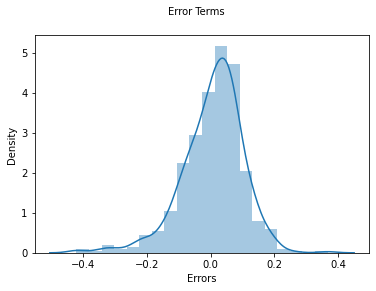

In [790]:
## lets plot Errot Term
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  
plt.xlabel('Errors', fontsize = 10) 

In [791]:
### By looking at the above plot we can see that Error's are distributed Normally 

Text(0.5, 1.0, 'Residual plot')

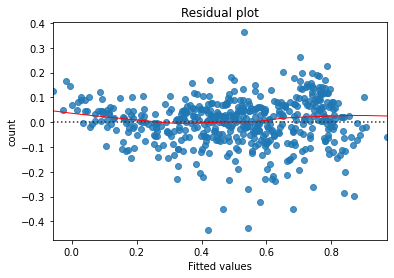

In [792]:
# Plot the scatter plot of the error terms vs 
fig = plt.figure()
sns.residplot(y_train_pred,y_train, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')  

In [793]:
## Please note residuals are near to Zero median

In [794]:
# Lets find Root Mean Square of train data
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8131121420882774

In [800]:
X_train_rfe

,year,temp,season_2,season_4,weather_2,weather_3,month_8,month_9,holiday_1
653,1,0.509887,0,1,0,0,0,0,0
576,1,0.815169,0,0,0,0,0,0,0
426,1,0.442393,0,0,1,0,0,0,0
728,1,0.245101,0,0,0,0,0,0,0
482,1,0.395666,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
526,1,0.824514,1,0,1,0,0,0,0
578,1,0.863973,0,0,0,0,1,0,0
53,0,0.202618,0,0,0,0,0,0,0
350,0,0.248216,0,1,1,0,0,0,0


In [795]:
# Findings:
    # Residuals are equally distributed
    # Mean of residual is Zero
    # Errors are normally distributed

In [803]:
#X_train_new = X_train_ref.drop('const', axis=1)

In [796]:
# Make Prediction
vars = ['temp', 'humidity', 'windspeed', 'count']
test[vars] = scaler.transform(test[vars])
test.head()
y_test = test.pop('count')
X_test = test
#X_test = x_test[x_train_sm.columns]
X_test_sm = add_constant(X_test)
#y_test_pred = lm.predict(X_test_sm)

In [805]:
X_test_sm = X_test_sm[X_train_rfe.columns]
#X_test_new = X_test_new.values.reshape(-1,1)

In [806]:
y_test_pred = lm.predict(X_test_sm)

In [ ]:
### Evaluate

Text(0, 0.5, 'y_test_pred')

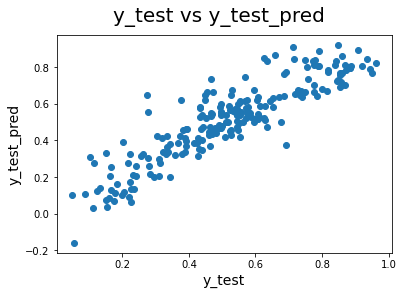

In [807]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                               # X-label
plt.ylabel('y_test_pred', fontsize=14)                          # Y-label

Text(0.5, 1.0, 'Normal Q-Q Plot')

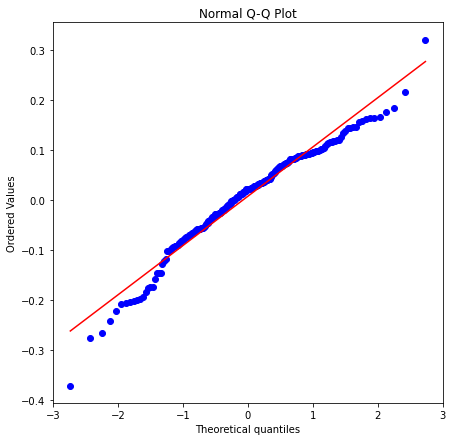

In [818]:
# Plotting Q-Q plot to confirm normal distribution of errors
error = y_test - y_test_pred
plt.figure(figsize=(7,7))
stats.probplot(error, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

In [808]:
# Lets find root mean square
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Rsquared value of train data: ", r2_train )
print("Rsquared value of test data: ", r2_test )

Rsquared value of train data:  0.8131121420882774
Rsquared value of test data:  0.7909202717911255


In [ ]:
### Findings : 
  # Rsquare value of train and test is almost equal train 81% and test 79% sounds very good and model is valid
  # 79% of R2 is good and this model can be used for decision making

In [812]:
### Validating Assumptions of Linear Regression.
# The assumptions of linear regression, made to create the model are the following.
# The predicted values have linear relationship with the actual values exmaple temperature.
# The error terms are normally distributed.
# The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
# There is no Multicollinearity between two independent variables.
# All categorical are converted to numeric dummy variables

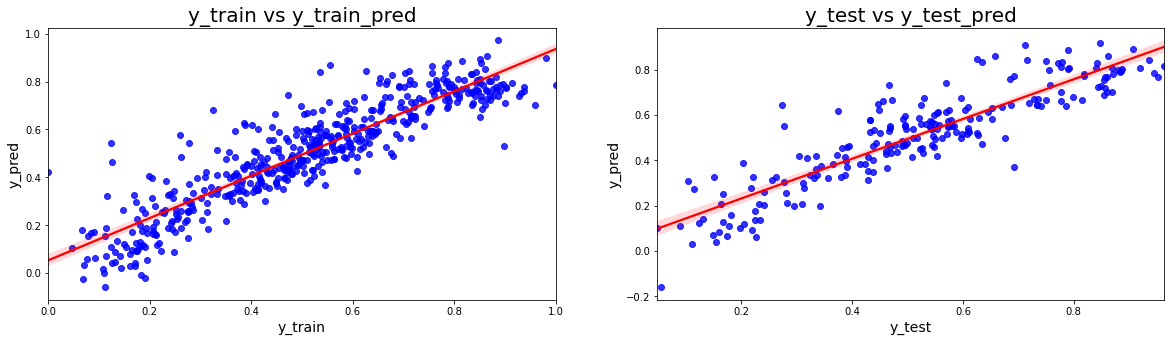

In [813]:
# 1) The predicted values have linear relationship with the actual values.
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.regplot( y_train, y_train_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)              
plt.xlabel('y_train', fontsize=14)  
plt.ylabel('y_pred', fontsize=14) 

plt.subplot(1,2,2)
sns.regplot( y_test, y_test_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)   
plt.xlabel('y_test', fontsize=14)   
plt.ylabel('y_pred', fontsize=14) 

plt.show()

In [814]:
# Above plot says target is having strong relationship with independant variables

In [815]:
#Conclusion:
#The final model selected is as below
print(lm.summary())
print(vif)

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1803.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                        0.00
Time:                        10:07:25   Log-Likelihood:                          466.21
No. Observations:                 510   AIC:                                     -914.4
Df Residuals:                     501   BIC:                                     -876.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [817]:
## Relationship between variables and target value can be explained as below
# count = 0.2420 x year + 0.6277 x temp + 0.1023 x season_2 + 0.1654 x season_4 - 0.0661 x weather_2 - 0.2842 x weather_3 + 0.0455 x month_8 + 0.1149 x month_9 - 0.0843 x holiday_1

# Following variables make positive impact on the bike rentals
   # temperature
   # season_2
   # seasson_4
   # month_8 
   # month_9
# Follwing variables makes negative impact on the bike rentals
   # weather_2
   # weather_3
   # Holiday_1